### The purpose of this project is to to create a model for predicting whether or not someone living in India who is 25-35 years old is likely to purchase travel insurance.


In [31]:
import pandas
from IPython.display import display, HTML
from sklearn import linear_model, metrics, ensemble
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
# read in the data
url = 'https://raw.githubusercontent.com/SunShinesDown/WillTheyBuyTravelInsurance/main/TravelInsuranceData.csv'
dfForModel = pandas.read_csv(url)
dfForDisplay = pandas.read_csv(url)

In [33]:
#clean data by dropping any rows that have missing values
dfForModel = dfForModel.dropna()

In [34]:
# turn string values to int
employmentType = {'Government Sector':0, 'Private Sector/Self Employed':1}
noYes = {'No':0, 'Yes':1}
dfForModel['Employment Type'] = dfForModel['Employment Type'].replace({'Government Sector': employmentType['Government Sector'],
'Private Sector/Self Employed': employmentType['Private Sector/Self Employed']})
dfForModel['GraduateOrNot'] = dfForModel['GraduateOrNot'].replace({'No': noYes['No'], 'Yes': noYes['Yes']})
dfForModel['FrequentFlyer'] = dfForModel['FrequentFlyer'].replace({'No': noYes['No'], 'Yes': noYes['Yes']})
dfForModel['EverTravelledAbroad'] = dfForModel['EverTravelledAbroad'].replace({'No': noYes['No'], 'Yes': noYes['Yes']})

In [35]:
#separate independent columns and the dependent column (category)
x = dfForModel.values[:, 1:9]
y = dfForModel.values[:, 9]

In [36]:
#divide data into training and test subsets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=34)

In [37]:
#create and train model
ranForestModel = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
ranForestModel.fit(xTrain, yTrain)

RandomForestClassifier(random_state=42)

In [38]:
#determine if the accuracy of the model is satisfactory
yPredict = ranForestModel.predict(xTest)
accuracy = metrics.accuracy_score(yTest, yPredict)
print(f'accuracy: {int(round(accuracy*100, 0))}%')

accuracy: 78%


In [39]:
#function for predicting whether or not customer will purchase the travel insurance
def predict(age, employmentType, graduateOrNot, annualIncome, FamilyMembers, chronicDiseases, frequentFlyer, everTravelledAbroad):
   return ranForestModel.predict([[age, employmentType, graduateOrNot, annualIncome, FamilyMembers, chronicDiseases, frequentFlyer, everTravelledAbroad]])

# User Interface

In [40]:
def displayOptions():
    print('using this application, you can make prediction on whether or not someone in India is likely to purchase travel insurance.')
    print('input ''a'' to start a new prediction')
    print('input ''q'' to quit the application')
    print()

In [41]:
inputs = []
userMenuInput = ''
while userMenuInput.lower() != 'q':
    displayOptions()
    userMenuInput = input('choose option: ')
    if userMenuInput.lower() == 'a':
        for i in range(8):
            if i == 0:
                while True:
                    try:
                        userInput = int(input('enter person\'s age (integer. 25-35 only): ' ))
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter an integer.')
            elif i == 1:
                while True:
                    try:
                        userInput = int(input('enter their type of employment (0 for government sector and 1 for private sector/self employed): '))
                        if userInput not in list(range(2)):
                            raise Exception()
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter 0 or 1.')
            elif i == 2:
                while True:
                    try:
                        userInput = int(input('did they graduate college(0 for no and 1 for yes): '))
                        if userInput not in list(range(2)):
                            raise Exception()
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter 0 or 1.')
            elif i == 3:
                while True:
                    try:
                        userInput = int(input('enter their annual income in USD (integer only. no higher than $22000): '))
                        userInput = userInput * 83
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter integer.')

            elif i == 4:
                    while True:
                        try:
                            userInput = int(input('enter number of family members (integer only): '))
                            inputs.append(userInput)
                            break
                        except:
                            print('wrong entry! enter integer.')

            elif i == 5:
                while True:
                    try:
                        userInput = int(input('do they have a chronic disease (0 for no and 1 for yes): '))
                        if userInput not in list(range(2)):
                            raise Exception()
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter 0 or 1.')
            elif i == 6:
                while True:
                    try:
                        userInput = int(input('are they a frequent flyer (0 for no and 1 for yes): '))
                        if userInput not in list(range(2)):
                            raise Exception()
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter 0 or 1.')
            elif i == 7:
                while True:
                    try:
                        userInput = int(input('have they ever travelled abroad (0 for no and 1 for yes): '))
                        if userInput not in list(range(2)):
                            raise Exception()
                        inputs.append(userInput)
                        break
                    except:
                        print('wrong entry! enter 0 or 1.')
        prediction = predict(inputs[0], inputs[1], inputs[2], inputs[3], inputs[4], inputs[5], inputs[6], inputs[7])
        prediction = 'not likely to purchase travel insurance' if prediction == 0 else 'likely to purchase travel insurance'
        print()
        print(f'prediction: {prediction}')
        print()
        inputs = []
print("thank you for using the application!")

using this application, you can make prediction on whether or not someone in India is likely to purchase travel insurance.
input a to start a new prediction
input q to quit the application

choose option: a
enter person's age (integer. 25-35 only): 28
enter their type of employment (0 for government sector and 1 for private sector/self employed): 1
did they graduate college(0 for no and 1 for yes): 1
enter their annual income in USD (integer only. no higher than $22000): 20000
enter number of family members (integer only): 3
do they have a chronic disease (0 for no and 1 for yes): 1
are they a frequent flyer (0 for no and 1 for yes): 1
have they ever travelled abroad (0 for no and 1 for yes): 1

prediction: likely to purchase travel insurance

using this application, you can make prediction on whether or not someone in India is likely to purchase travel insurance.
input a to start a new prediction
input q to quit the application

choose option: q
thank you for using the application!


# Travel insurance sales to government sector workers vs private sector/self employed workers

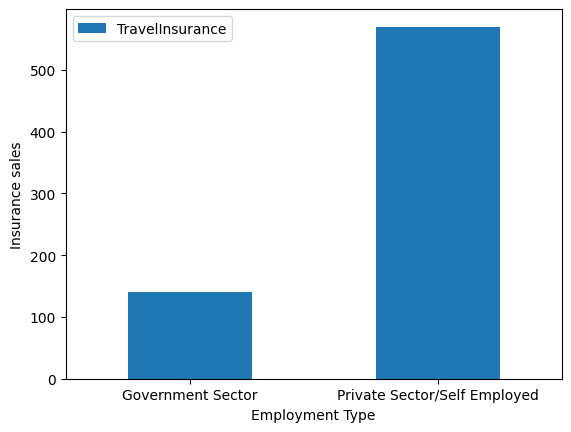

In [42]:
salesOnly = dfForDisplay[dfForDisplay['TravelInsurance'] == 1]
jobTypeSales = salesOnly.groupby('Employment Type')['TravelInsurance'].count().reset_index()
jobTypeSales.plot.bar(x='Employment Type', y='TravelInsurance', ylabel='Insurance sales', rot=0)
plt.show()

# Percentage of insurance Sales to people in 20s vs 30s

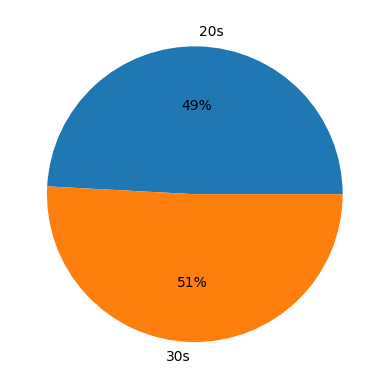

In [43]:
ageSales = salesOnly.groupby('Age')['TravelInsurance'].count().reset_index()
ageSales['Age Range'] = pandas.cut(x=ageSales['Age'], bins=[19,29,39], labels=['20s', '30s'],include_lowest=True)
ageSales = ageSales.groupby('Age Range', observed=False)['TravelInsurance'].sum().reset_index()
plt.pie(ageSales['TravelInsurance'], labels=ageSales['Age Range'], autopct='%.0f%%')
plt.show()

# Travel insurance sales based on income

In [44]:
incomeSales = salesOnly.groupby('AnnualIncome')['TravelInsurance'].count().reset_index()

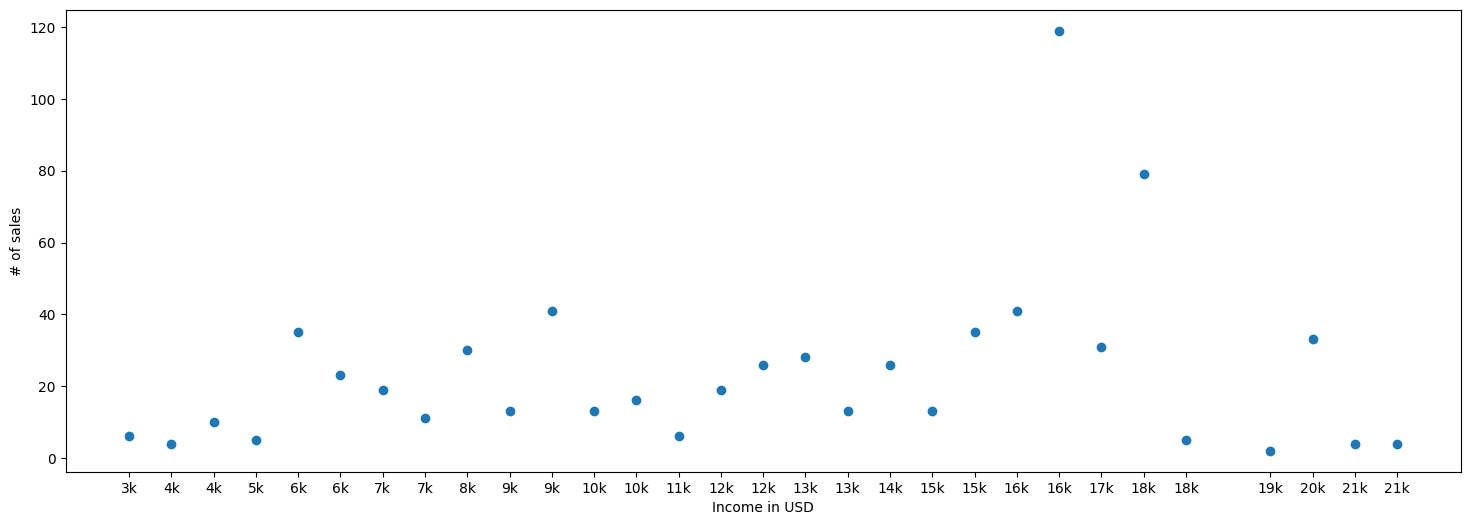

In [45]:
plt.figure(figsize=(18, 6))
# turn indian rupees to usd
strings = [f'{(val // 83) // 1000}k' for val in incomeSales['AnnualIncome']]
plt.xticks(incomeSales['AnnualIncome'], strings)
plt.scatter(x=incomeSales['AnnualIncome'], y=incomeSales['TravelInsurance'])
plt.xlabel('Income in USD')
plt.ylabel('# of sales')
plt.show()